<a href="https://colab.research.google.com/github/brunoleme/Social_Network_Analysis/blob/main/Social_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dependencies**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

In [ ]:
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import roc_auc_score

The nodes and edges data of this study is from my personal social network on Facebook, collected in 2014 through Facebook Netvizz Tool. The list of friends invited to my wedding in 2018 was generated manuallly. 

In [ ]:
df_friends_nodes = pd.read_csv('/content/drive/My Drive/Facebook_Data_Bruno_Leme/Facebook_Friends_Nodes.csv') #Nodes
df_friends_edges = pd.read_csv('/content/drive/My Drive/Facebook_Data_Bruno_Leme/Facebook_Friends_Edges.csv') #Edges
df_friends_wedding_inviteds = pd.read_csv('/content/drive/My Drive/Facebook_Data_Bruno_Leme/Facebook_Friends_Wedding_Inviteds.csv', sep=';') #Friends inviteds to my wedding

# **Data Prep**

In [ ]:
df_friends_nodes

,Id,Label,timeset,sex,locale,agerank
0,530759938,Alexandre Kazuo Yassuda,NaN,male,pt_BR,1202
1,531013568,Carol Senger,NaN,female,pt_BR,1201
2,534275844,Ramon Prado,NaN,male,en_US,1200
3,534300238,Sylvia Regina,NaN,female,pt_BR,1199
4,537347192,Maria Aparecida Gameiro,NaN,female,de_DE,1198
...,...,...,...,...,...,...
1197,100006665768869,Ernesto Sérgio,NaN,male,pt_BR,5
1198,100006826684608,Samara Carneiro,NaN,female,pt_BR,4
1199,100006879907526,Roberto Salles,NaN,male,pt_BR,3
1200,100006924008870,Ricardo Barbosa,NaN,male,pt_BR,2


In [ ]:
dict_friends_nodes = {Id:Label for Id, Label in df_friends_nodes[['Id', 'Label']].values}

In [ ]:
#df_friends_edges['Source_Label'] = df_friends_edges.Source.apply(lambda x: dict_friends_nodes[x])
#df_friends_edges['Target_Label'] = df_friends_edges.Target.apply(lambda x: dict_friends_nodes[x])

In [ ]:
df_friends_edges

,Source,Target,Type,Id,Label,timeset,Weight
0,531013568,631274226,Undirected,0,NaN,NaN,1
1,531013568,645684047,Undirected,1,NaN,NaN,1
2,531013568,657927805,Undirected,2,NaN,NaN,1
3,534275844,534300238,Undirected,3,NaN,NaN,1
4,540657595,572592023,Undirected,4,NaN,NaN,1
...,...,...,...,...,...,...,...
25599,100005894858656,100006297810521,Undirected,25599,NaN,NaN,1
25600,100005894858656,100006826684608,Undirected,25600,NaN,NaN,1
25601,100006036463865,100006172444215,Undirected,25601,NaN,NaN,1
25602,100006040086262,100006665768869,Undirected,25602,NaN,NaN,1


# **Graph Creation**

In [ ]:
G = nx.Graph()

In [ ]:
G.add_nodes_from(df_friends_nodes['Id'].values)
G.add_edges_from(df_friends_edges[['Source','Target']].values)

# **Network Metrics Calculation (SNA Features)**

Based on the generated graph, we'll compute possible measures based on the patterns of conection between users.

In [ ]:
#Find communities in graph using Clauset-Newman-Moore greedy modularity maximization.
#Greedy modularity maximization begins with each node in its own community and joins the pair of communities that most increases modularity until no such pair exists.
communities = greedy_modularity_communities(G)

In [ ]:
#SNA Centrality metrics
degree_centrality = nx.degree_centrality(G) #measures, to each node v, the fraction of nodes that v is connected to, normalized by the division by (n-1) possible nodes.
closeness_centrality = nx.closeness_centrality(G) #measures, to each node v, the reciprocal of the averaged shortest-path distance between v and all the other notes it can reach.
betweenness_centrality = nx.betweenness_centrality(G) #measures, to each node v, the sum of the fraction of all-pairs shortest paths that pass through v
eigenvector_centrality = nx.eigenvector_centrality(G) #measures the centrality for a node based on the centrality of its neighbors. Based on a spectral decomposition method.
subgraph_centrality = nx.subgraph_centrality(G) #measures the sum of weighted closed walks of all lengths starting and ending at node n.

In [ ]:
#function to get the community id of a node, in the list of frozensets of communities.
def get_community_id(x):
  for id, c in enumerate(communities):
    if x in list(c):
      return id
  return -1

In [ ]:
#Enriching initial dataset with calculated SNA features and community id
df_friends_nodes['community_id'] = df_friends_nodes['Id'].apply(get_community_id)
df_friends_nodes['degree_centrality'] = df_friends_nodes['Id'].apply(lambda x: degree_centrality[x])
df_friends_nodes['closeness_centrality'] = df_friends_nodes['Id'].apply(lambda x: closeness_centrality[x])
df_friends_nodes['betweenness_centrality'] = df_friends_nodes['Id'].apply(lambda x: betweenness_centrality[x])
df_friends_nodes['eigenvector_centrality'] = df_friends_nodes['Id'].apply(lambda x: eigenvector_centrality[x])
df_friends_nodes['subgraph_centrality'] = df_friends_nodes['Id'].apply(lambda x: subgraph_centrality[x])

In [ ]:
df_friends_nodes

,Id,Label,timeset,sex,locale,agerank,community_id,degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality,subgraph_centrality
0,530759938,Alexandre Kazuo Yassuda,NaN,male,pt_BR,1202,0,0.011657,0.276928,0.000120,0.000001,5.658480e+42
1,531013568,Carol Senger,NaN,female,pt_BR,1201,4,0.034971,0.253463,0.000430,0.000011,3.725105e+44
2,534275844,Ramon Prado,NaN,male,en_US,1200,1,0.016653,0.295424,0.000835,0.002146,1.504496e+49
3,534300238,Sylvia Regina,NaN,female,pt_BR,1199,1,0.009159,0.257219,0.000003,0.000095,2.944517e+46
4,537347192,Maria Aparecida Gameiro,NaN,female,de_DE,1198,7,0.010824,0.324916,0.000064,0.000107,3.663454e+46
...,...,...,...,...,...,...,...,...,...,...,...,...
1197,100006665768869,Ernesto Sérgio,NaN,male,pt_BR,5,0,0.038301,0.350567,0.003583,0.000295,2.763967e+47
1198,100006826684608,Samara Carneiro,NaN,female,pt_BR,4,1,0.099084,0.344454,0.000882,0.067231,1.476331e+52
1199,100006879907526,Roberto Salles,NaN,male,pt_BR,3,0,0.006661,0.290333,0.000005,0.000006,1.332682e+44
1200,100006924008870,Ricardo Barbosa,NaN,male,pt_BR,2,0,0.004163,0.289745,0.000001,0.000008,1.958194e+44


In [ ]:
#Export data to generate graphs on Gephi
df_friends_nodes.to_csv('/content/drive/My Drive/Facebook_Data_Bruno_Leme/Facebook_Friends_Nodes_with_SNA_Metrics.csv', index=False)

# **SNA Features - Descriptive Analysis**

## **Detected Communities**

### **Community Sizes**

Is it possible to see 25 comunnities detected, in the following frequency table we can observe that there are a few big communities, but majority of communities are very small.

In [ ]:
df_friends_nodes[['Label', 'community_id']].groupby('community_id').aggregate('count')

,Label
community_id,
0,505
1,380
2,71
3,65
4,58
5,52
6,22
7,18
8,10


### **Community Colour Pallete**

We use the following pallete of colour to represent the communities. We considered gray colour from the community 8 and on.

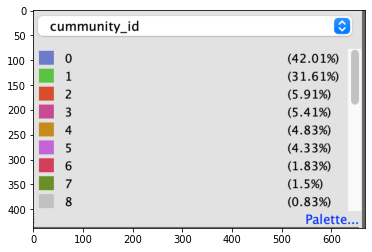

In [ ]:
img = mpimg.imread('/content/drive/My Drive/Facebook_Data_Bruno_Leme/Community_Colour_Pallete.png')
imgplot = plt.imshow(img)
plt.show()

### **My Social Network Graph**

In following, we can observe the graph of my social network built in Gephi, a graph tool that allow fancy graphs with graph data. The colour node discriminates which community the node belongs.

The nodes disposition is determined automatically with algorithm Fruchterman Reingold (available in Gephi tool), based on the relatioship between all nodes.

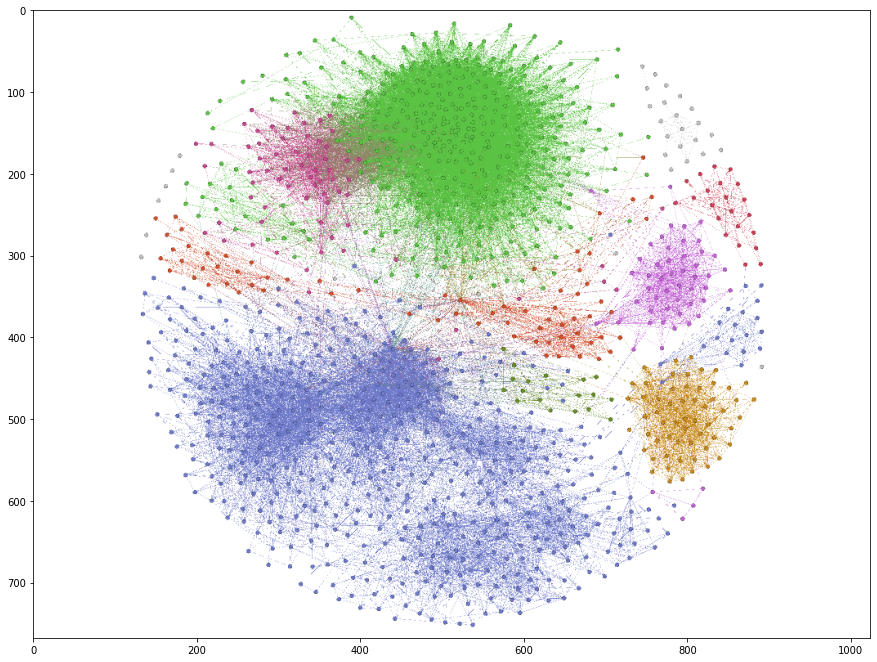

In [ ]:
img = mpimg.imread('/content/drive/My Drive/Facebook_Data_Bruno_Leme/My_Network_Pure.png')
fig = plt.figure(figsize=(15, 15))
imgplot = plt.imshow(img)
plt.show()

**Community 0 (blue)** is the biggest one, it contains my siblings (Priscila Leme, Marília Gabriela Leme and Alexandre Leme), its friends an family, also my childhood friends, elentary and high school classmates, and their related friends/family. Ths disposition of nodes is a little sparse, it indicates that these friends that are not necessary close from each other (this can be explained by the different generations and moments of friendship with this people, some from elemantary school, others from high school, others from neighborhood, and friends of my siblings, etc).

In [ ]:
df_friends_nodes[df_friends_nodes['community_id'] == 0][['Label', 'community_id']].sample(10, random_state=123) #Childhood friends and family, and also my siblings (Priscila, Marília and Alexandre Leme) and their friends

,Label,community_id
865,Camila Meneghette Frade,0
713,Ana Li,0
1040,Carmen Fontes Brito,0
991,Alexandre Figlie Minotelli,0
1012,Rubens Guilherme,0
273,Tânia Cristina Bianca Sberveglieri,0
10,Rafael Lander,0
897,Bruno Massahud Rivera,0
1026,Fernando P. Rosa,0
784,Vivian Zeraik,0


In [ ]:
df_friends_nodes[df_friends_nodes['Label'].isin(['Priscila Leme', 'Marilia Gabriela Leme', 'Alexandre Leme Neto'])][['Label', 'community_id']] #My siblings

,Label,community_id
248,Alexandre Leme Neto,0
267,Marilia Gabriela Leme,0
684,Priscila Leme,0


All friends from **Community 1 (green)** are from the Samba School I belong (Mocidade Alegre), or their related friends/family. Different from previous one, this community have a very dense connection between members. It's usual to know lots of people inside a Samba School. 

In [ ]:
df_friends_nodes[df_friends_nodes['community_id'] == 1][['Label', 'community_id']].sample(10, random_state=123) #Samba School (Mocidade Alegre) Friends

,Label,community_id
819,Patty Vieira,1
756,Marabel Nunes Pires,1
973,Eduardo Esposito,1
542,Luciana Nascimento,1
839,Jesse Teixeira,1
662,Lucy Garcia,1
597,Renata Comunidade Csa,1
711,Célia Prado,1
950,Felipe Pereira da Silva,1
661,Leticia Campos Marcolino,1


**Community 2 (red)** reunites my wife friends and family, as well as my father's relatives (2nd grade cousins).

In [ ]:
df_friends_nodes[df_friends_nodes['community_id'] == 2][['Label', 'community_id']].sample(10, random_state=123) #My father's side family and my wife's family/friends

,Label,community_id
271,Gi India,2
840,Luiz Otavio,2
837,Pri Maitan,2
707,Vanessa Santos,2
781,Camila Rodrigues Domingos,2
568,Adriana Vaz,2
277,Hugo Amaral,2
547,Marcos Ferreira,2
829,Eduardo Leme,2
141,Elaine Cristina L Miranda,2


In [ ]:
df_friends_nodes[df_friends_nodes['Label'].isin(['Rafaela Karoliny'])][['Label', 'community_id']] #My wife

,Label,community_id
162,Rafaela Karoliny,2


My friends from **Community 3 (pink)** are also from Mocidade Alegre, actuslly they are disposed closelly with community 1, the difference is that its memebers are from the family of founders of Mocidade Alegre Samba School, or their frinds. It's interesting that the community detection algorithm detected this difference.

In [ ]:
df_friends_nodes[df_friends_nodes['community_id'] == 3][['Label', 'community_id']].sample(10, random_state=123) #Samba School (Mocidade Alegre) Friends - Founders Family

,Label,community_id
1058,Márcia Garcia Cruz,3
679,Patricia Sousa,3
627,Veronica Rosa,3
871,Clara Cruz,3
953,Tina Cruz,3
1172,Bruno Pombo Cunha,3
918,Bruninho Martins,3
350,Bruno Spiandorim,3
851,Elder Gravalos,3
575,Cláudia Cruz Zamboni,3


All those sample of friends of **Community 4 (orange)** are from one of my former jobs: DTM Ibope.

In [ ]:
df_friends_nodes[df_friends_nodes['community_id'] == 4][['Label', 'community_id']].sample(10, random_state=123) #Coworkers from DTM Ibope

,Label,community_id
727,Josie Franco,4
485,Weslley Moura,4
152,Rodrigo Ribeiro,4
806,Bernardo Brito,4
357,Tarsila Tavares,4
351,Gabriel Marquez,4
947,Karla Guimarães,4
464,Caio Serra,4
206,Fran Rodrigues,4
303,Alexandre Pereira Cavalheiro,4


Similar to the previous one, all those sample of friends of **Community 5 (purple)** are from another of my former jobs: BNP Paripas Cardif.

In [ ]:
df_friends_nodes[df_friends_nodes['community_id'] == 5][['Label', 'community_id']].sample(10, random_state=123) #Coworkers from BNP Paribas Cardif

,Label,community_id
1127,Bruna Bravin,5
607,Ivan Orosco,5
559,Fernanda Gomes Alves,5
511,Marcio Mainardi,5
418,Evaristo Moreira,5
316,Edson Teramoto,5
446,Pedro Vinicius Melo,5
348,Cintia Moura,5
890,Tarsila Viggiani,5
29,Ronaldo França,5


All those sample of friends of **Community 6 (magenta)** are classmates from post graduation course: Data Analysis and Data Mining at FIA School. In fact, the last sample is not a friend, but a profile managed by this course staff.

In [ ]:
df_friends_nodes[df_friends_nodes['community_id'] == 6][['Label', 'community_id']].sample(10, random_state=123) #Classmates from Post Graduation

,Label,community_id
148,Alex Ferreira,6
293,Keith Matsumoto,6
153,Tatiane Couto Martins,6
928,Gustavo Abud,6
107,Viviana Sayão Gabriel,6
788,André Kawauti,6
335,Paulo Bueno Bruno,6
1150,Renato Teixeira,6
702,Rodrigo Franco,6
638,Data Mining Fia,6


**Community 7 (dark green)** reunites my mother side of family (like my uncle Edmilson its son Raphael Piotto and wife Rosemeire Piotto) and its friends.

In [ ]:
df_friends_nodes[df_friends_nodes['community_id'] == 7][['Label', 'community_id']].sample(10, random_state=123) #My mother's side family

,Label,community_id
225,Edmilson Cardoso,7
605,Luciana Gameiro,7
872,Caio Batista Kempe,7
448,Raphael Piotto,7
289,Flavia Rodrigues,7
383,Viviane Machado,7
4,Maria Aparecida Gameiro,7
884,Rafael Lino,7
1175,Compania Dos Cases,7
507,Rosemeire Piotto,7


## **Calculated Metrics**

### **Degree Centrality**

In [ ]:
df_friends_nodes[['Label', 'degree_centrality']].sort_values('degree_centrality', ascending=False).head(10)

,Label,degree_centrality
339,Sidnei França,0.217319
720,Fabio Carromeu,0.207327
932,Aline Oliveira,0.203164
400,Jocimar Martins Martins,0.197336
817,Comissão da Morada,0.194838
915,Adriana Gomes,0.190674
481,Su Farias,0.183181
927,Erica Ferreira,0.183181
684,Priscila Leme,0.181515
83,Lika Murfhy,0.179850


Excepting by my sister Priscila Leme, the other friends with highest Degree Centrality are not actually leaders from my social network, but they are the leaders of Community 1 (Mocidade Alegre). Sidney was the Carnavalesco in that period, Fabio Carromeu was the responsible by the Cultural Department, Aline Oliveira was the Drums Queen, like the others. The high density of this community and the position of these top members, explain their high level of Degree Centrality, once this metric is based con conections.

### **Closeness Centrality**

In [ ]:
df_friends_nodes[['Label', 'closeness_centrality']].sort_values('closeness_centrality', ascending=False).head(10)

,Label,closeness_centrality
684,Priscila Leme,0.470881
162,Rafaela Karoliny,0.426210
775,Bruno Zamboni,0.421041
880,Rafael Cruz,0.417664
126,Marcio Peres Pereira,0.415543
817,Comissão da Morada,0.414191
945,Guardioes da Morada,0.411070
378,Emerson Ramires,0.410775
777,Marília Palazini,0.410187
122,Vinicius Cruz,0.407706


My sister Priscila Leme and my wife Rafaela Karoliny can be considered leaders of my social network. As this measure is based on how shortest is the path between them and all other friends from my network, they both has friendship with several distinct groups of my social networks, and they usually go out with me to every event or party.

### **Betweenness Centrality**

In [ ]:
df_friends_nodes[['Label', 'betweenness_centrality']].sort_values('betweenness_centrality', ascending=False).head(10)

,Label,betweenness_centrality
684,Priscila Leme,0.222842
551,Andre Dantas,0.071518
162,Rafaela Karoliny,0.055357
777,Marília Palazini,0.054202
248,Alexandre Leme Neto,0.042346
171,Isabela Roque,0.034248
702,Rodrigo Franco,0.031205
126,Marcio Peres Pereira,0.024375
227,Patricia Coelho,0.024159
761,Mariana De Faria,0.023611


Betweenness Centrality is more precise to get leadership aspects in my social network, because it measures the number of times a node appears in all shortest paths. This tend to get friends that are in a central position of my life. Beyond my sister Priscila and my wife Rafaela Karoliny, mentioned previously in Closeness Centrality, this measure enhances Marília Palazini, my best friend from hometown, Alexandre Leme Neto, my brother, Andre Dantas, my best friend from high school, and Márcio Peres Pereira, my best friend from Mocidade Alegre Samba School.

### **Eigenvector Centrality**

In [ ]:
df_friends_nodes[['Label', 'eigenvector_centrality']].sort_values('eigenvector_centrality', ascending=False).head(10)

,Label,eigenvector_centrality
720,Fabio Carromeu,0.111784
339,Sidnei França,0.110670
400,Jocimar Martins Martins,0.106912
932,Aline Oliveira,0.106681
927,Erica Ferreira,0.105400
481,Su Farias,0.104783
915,Adriana Gomes,0.103006
817,Comissão da Morada,0.102146
83,Lika Murfhy,0.101468
939,Carlos Ed Murph Farias,0.099515


Eigenvector Centrality is also based on conections, it enhances popular friends and leaders from Community 1 (Mocidade Alegre).

### **Subgraph Centrality**

In [ ]:
df_friends_nodes[['Label', 'subgraph_centrality']].sort_values('subgraph_centrality', ascending=False).head(10)

,Label,subgraph_centrality
720,Fabio Carromeu,4.081325e+52
339,Sidnei França,4.000352e+52
400,Jocimar Martins Martins,3.733337e+52
932,Aline Oliveira,3.717217e+52
927,Erica Ferreira,3.628448e+52
481,Su Farias,3.586120e+52
915,Adriana Gomes,3.465527e+52
817,Comissão da Morada,3.407893e+52
83,Lika Murfhy,3.362833e+52
939,Carlos Ed Murph Farias,3.234626e+52


Eigenvector Centrality is very influenced by the high density of connections from Community 1 (Mocidade Alegre).

### **Plotting the network again, but changing node size based on Betweeness Centrality**

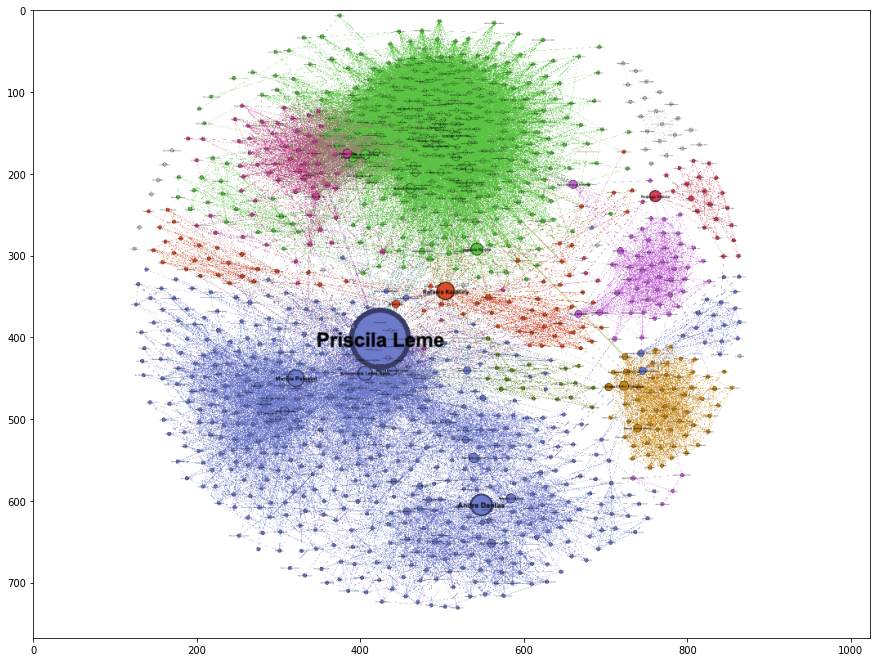

In [ ]:
img = mpimg.imread('/content/drive/My Drive/Facebook_Data_Bruno_Leme/My_Network.png')
fig = plt.figure(figsize=(15, 15))
imgplot = plt.imshow(img)
plt.show()

We can observe that Priscila is the leader of my social network, followed by Rafaela Karoliny, Alexandre Leme Neto, Andre Dantas and Marilia Palazine (my best friend from my hometown).

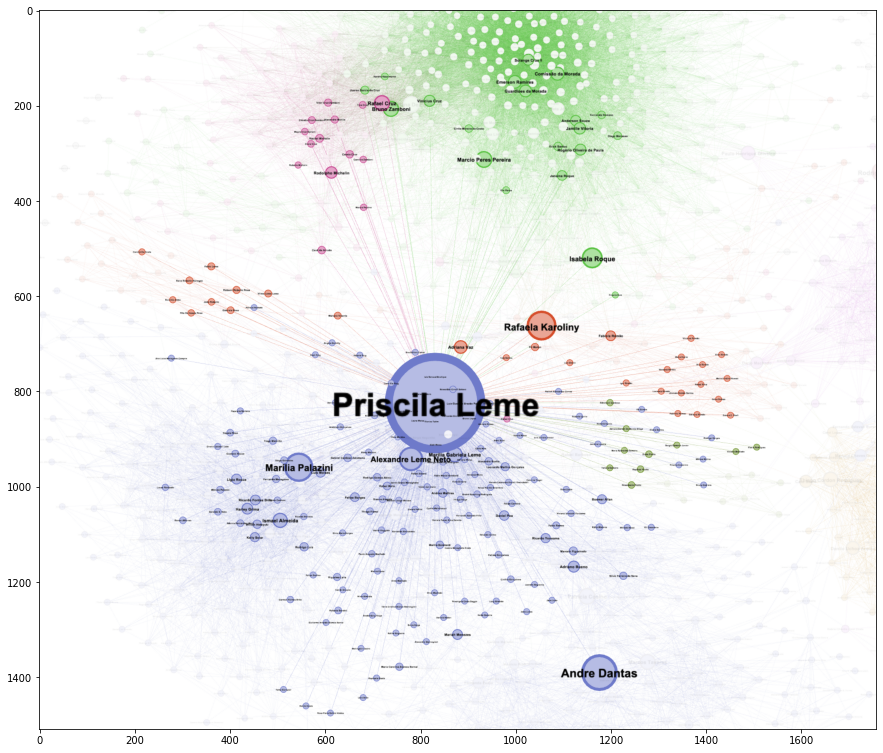

In [ ]:
img = mpimg.imread('/content/drive/My Drive/Facebook_Data_Bruno_Leme/My_Network_Zoom_2.png')
fig = plt.figure(figsize=(15, 15))
imgplot = plt.imshow(img)
plt.show()

We can note that Priscila have friendship with several friends of mine, from different communities.

# **Using SNA Features in a Classification Task**

Let's try to predict if this Social Network Analysis measures can help us to predict if, a few years later, who would be invited to my Wedding party.

## **Data Prep**

In [ ]:
df_friends_nodes['invited'] = df_friends_nodes['Id'].apply(lambda x: 1 if x in df_friends_wedding_inviteds.Id.values else 0)

In [ ]:
x_samples = df_friends_nodes[['sex','degree_centrality', 'closeness_centrality',
                             'betweenness_centrality', 'eigenvector_centrality',
                             'subgraph_centrality', 'community_id']]

In [ ]:
y_samples = df_friends_nodes[['invited']]

As the number of responses are quite low (100), we will not split in train/test samples.

In [ ]:
y_samples.sum()

invited    100
dtype: int64

In [ ]:
x_samples.dtypes

sex                        object
degree_centrality         float64
closeness_centrality      float64
betweenness_centrality    float64
eigenvector_centrality    float64
subgraph_centrality       float64
community_id                int64
dtype: object

In [ ]:
x_samples['community_id'] = x_samples['community_id'].astype(object)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
x_samples.dtypes

sex                        object
degree_centrality         float64
closeness_centrality      float64
betweenness_centrality    float64
eigenvector_centrality    float64
subgraph_centrality       float64
community_id               object
dtype: object

In [ ]:
x_samples.columns

Index(['sex', 'degree_centrality', 'closeness_centrality',
       'betweenness_centrality', 'eigenvector_centrality',
       'subgraph_centrality', 'community_id'],
      dtype='object')

In [ ]:
x_samples = pd.get_dummies(x_samples)

In [ ]:
x_samples = x_samples.drop(['sex_female', 'community_id_0'], axis=1)

## **Model Fitting**

In [ ]:
scaler = StandardScaler()
clf = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)

In [ ]:
clf.fit(scaler.fit_transform(x_samples), y_samples)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('AUC', roc_auc_score(y_samples, clf.predict_proba(scaler.transform(x_samples))[:,1]))

AUC 0.8587840290381125


As seem above, the set of SNA metrics can be very useful to predict this type of event.